# Mall Customers Segmentation - Unsupervised Learning

In this project I have tried to demonstrate the use of Machine Learning in businesses for profit enhancement.
Unsupervised Learning(Clustering) is used to find the hidden data patterns or structures which can be used by an organization(like mall, shopping complexes,etc) to target the right audience and hence increase profit margin.
Also, this approach allows the organizations to spend less on advertisements by first choosing the right audience and then advertising.

In [1]:
# Importing important libraries required
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the data into a pandas DataFrame
df = pd.read_csv(r'C:\Users\SAGNIK CHAKRABORTY\Downloads\Projects\Mall Cutomers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have following features :
1. CustomerID : It is the unique ID given to a customer
2. Gender : Gender of the customer
3. Age : The age of the customer 
4. Annual Income(k$) : It is the annual income of the customer 
5. Spending Score : It is the score(out of 100) given to a customer by the, mall authorities, based on the money spent and the behavior of the customer.

In [3]:
# Getting the insides of the data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# GEtting the insides of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Getting the insides of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# Making  the independent variables matrix

X = df.iloc[:, [3, 4]].values


For the sake of simplicity, the dataset used only 2 variables — annual income and spending score. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.




In [7]:
# One Hot Encoding the categorical data - Gender

df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

In [8]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,64,19,3,0,1
9,10,30,19,72,1,0


In [9]:
#Using KMeans for clustering

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)

    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [10]:
font_title = {'family' : 'normal',

        'weight' : 'bold',

        'size'   : 35}

In [11]:
font_axes = {'family' : 'normal',

        'weight' : 'normal',

        'size'   : 28}

C:\Users\SAGNIK CHAKRABORTY\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


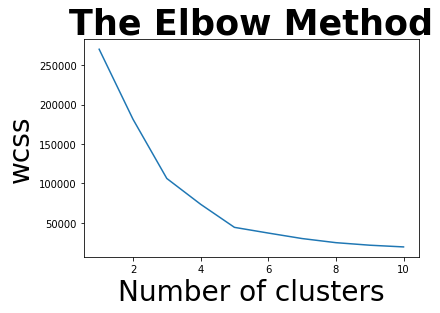

In [12]:
# The Elbow Method to find the number of clusters

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method', **font_title)

plt.xlabel('Number of clusters', **font_axes)

plt.ylabel('wcss', **font_axes)

plt.show()

The figure above demonstrates the elbow method which helps in finding the appropriate number of clusters in a dataset.It is clear from the figure that we should take number of clusters equal to 5, as the slope of the curve is not steep enough after it.

In [13]:
#Taking number of clusters = 5

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)

y_kmeans = kmeans.fit_predict(X)

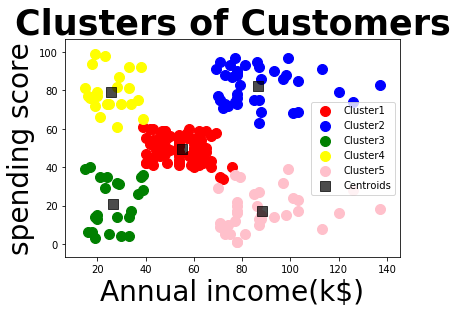

In [18]:
# PLotting the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,marker='s', c='black', alpha=0.7, label='Centroids')

plt.title('Clusters of Customers', **font_title)

plt.xlabel('Annual income(k$)', **font_axes)

plt.ylabel('spending score', **font_axes)

plt.legend()

plt.show()

The data(clusters) are plotted on a spending score Vs annual income curve.
Let us now analyze the results of the model.

# Analyzing the Results
We can see that the mall customers can be broadly grouped in 5 groups based on their purchases made in the mall.

In cluster 3(green colored) we can see people have low annual income and low spending score, this is quite reasonable as people having low salary prefer to buy less, in fact these are the wise people who knows how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

In cluster 4(yellow colored) we can see that people have low income but higher spending score, these are those people who for some reason loves to buy products more often even though they have a low income. Maybe its due to the fact that these people are more than satisfied with the mall services. The shops/mall might not target these people that effectively but still will not loose them.

In cluster 1(red colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 2(blue colored) we see that people have high income and high spending score, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In cluster 5(pink colored) we see that people have high income but low spending score, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 1 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 2, cluster 3 and cluster 4 happy and satisfied.